<a href="https://colab.research.google.com/github/ArohiniAshokan/sms_spam_nlp/blob/main/NLP_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SMS Spam Detection using NLP and ML**

Accessing the training data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import re
df1=pd.read_csv('/content/SMS_train (1).csv',encoding='ISO-8859-1')
df1

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


Accessing the testing data

In [ ]:
df2=pd.read_csv('/content/SMS_test (2).csv',encoding='ISO-8859-1')
df2

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


Concatenating the datasets into a single dataset

In [ ]:
df=pd.concat([df1,df2],axis=0)
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [ ]:
df.tail()

,S. No.,Message_body,Label
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
124,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [ ]:
df.dtypes

S. No.           int64
Message_body    object
Label           object
dtype: object

In [ ]:
df.columns

Index(['S. No.', 'Message_body', 'Label'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 124
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        1082 non-null   int64 
 1   Message_body  1082 non-null   object
 2   Label         1082 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.8+ KB


In [ ]:
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [ ]:
df['Label'].value_counts()

Non-Spam    884
Spam        198
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

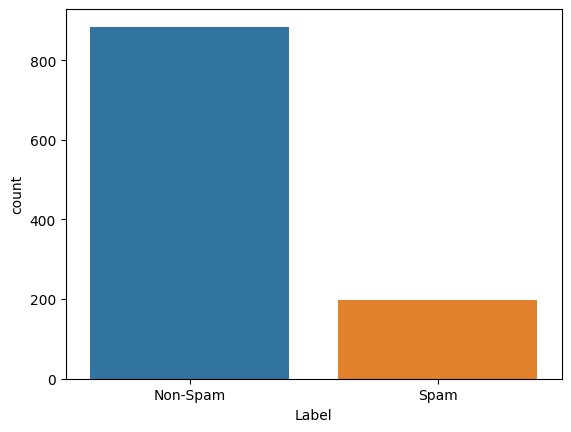

In [ ]:
sns.countplot(x=df['Label'])

Dropping unnecessary columns

In [ ]:
df.drop(['S. No.'],axis=1,inplace=True)
df.head()

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam


In [ ]:
df['Label']=df['Label'].map({'Spam':0,'Non-Spam':1})
df.head()

,Message_body,Label
0,Rofl. Its true to its name,1
1,The guy did some bitching but I acted like i'd...,1
2,"Pity, * was in mood for that. So...any other s...",1
3,Will ü b going to esplanade fr home?,1
4,This is the 2nd time we have tried 2 contact u...,0


In [ ]:
df.dtypes

Message_body    object
Label            int64
dtype: object

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omv-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading omv-1.4: Package 'omv-1.4' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
messages=df['Message_body']
messages

0                             Rofl. Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity, * was in mood for that. So...any other s...
3                   Will ü b going to esplanade fr home?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear. You read something f...
122    Sun ah... Thk mayb can if dun have anythin on....
123    SYMPTOMS when U are in love: "1.U like listeni...
124    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 1082, dtype: object

Tokenization

In [ ]:
#tokenization
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
messages=messages.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
messages

0                            Rofl . Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity , * was in mood for that . So ... any oth...
3                  Will ü b going to esplanade fr home ?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear . You read something ...
122    Sun ah ... Thk mayb can if dun have anythin on...
123    SYMPTOMS when U are in love : " 1 . U like lis...
124    Great . Have a safe trip . Dont panic surrende...
Name: Message_body, Length: 1082, dtype: object

Removing special characters

In [ ]:
#remove special characters
messages=messages.str.replace('[^a-zA-Z0-9]+',' ')
messages

<ipython-input-43-a02a8b69acb3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  messages=messages.str.replace('[^a-zA-Z0-9]+',' ')


0                              Rofl Its true to its name
1      The guy did some bitching but I acted like i d...
2      Pity was in mood for that So any other suggest...
3                     Will b going to esplanade fr home 
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear You read something fo...
122    Sun ah Thk mayb can if dun have anythin on Thk...
123    SYMPTOMS when U are in love 1 U like listening...
124     Great Have a safe trip Dont panic surrender all 
Name: Message_body, Length: 1082, dtype: object

Stemming

In [ ]:
#stemming
from nltk.stem import SnowballStemmer
ss=SnowballStemmer('english')
messages=messages.apply(lambda x:([ss.stem(i.lower()) for i in tk.tokenize(x)])).apply(lambda x:' '.join(x))
messages

0                                rofl it true to it name
1      the guy did some bitch but i act like i d be i...
2         piti was in mood for that so ani other suggest
3                          will b go to esplanad fr home
4      this is the 2nd time we have tri 2 contact u u...
                             ...                        
120    7 wonder in my world 7th you 6th ur style 5th ...
121       tri to do someth dear you read someth for exam
122    sun ah thk mayb can if dun have anythin on thk...
123    symptom when u are in love 1 u like listen son...
124        great have a safe trip dont panic surrend all
Name: Message_body, Length: 1082, dtype: object

Removing stopwords

In [ ]:
#stopwords
from nltk.corpus import stopwords
sw=stopwords.words('english')
messages=messages.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
messages

0                                         rofl true name
1      guy bitch act like interest buy someth els nex...
2                                  piti mood ani suggest
3                                  b go esplanad fr home
4      2nd time tri 2 contact u u 750 pound prize 2 c...
                             ...                        
120    7 wonder world 7th 6th ur style 5th ur smile 4...
121                     tri someth dear read someth exam
122    sun ah thk mayb dun anythin thk book e lesson ...
123    symptom u love 1 u like listen song 2 u get st...
124                   great safe trip dont panic surrend
Name: Message_body, Length: 1082, dtype: object

Vectorization

In [ ]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
x=vec.fit_transform(messages)
x

<1082x2997 sparse matrix of type '<class 'numpy.float64'>'
	with 9599 stored elements in Compressed Sparse Row format>

In [ ]:
y=df['Label'].values
y

array([1, 1, 1, ..., 1, 1, 1])

Splitting training and testing data

In [ ]:
#split training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train  #huge data so cannot be printed

<757x2997 sparse matrix of type '<class 'numpy.float64'>'
	with 6772 stored elements in Compressed Sparse Row format>

Model creation - KNN, SVM, Naive Bayes, Decision tree, Random forest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
km=KNeighborsClassifier()
nb=MultinomialNB()
sv=SVC()
dm=DecisionTreeClassifier()
rm=RandomForestClassifier()
model=[km,nb,sv,dm,rm]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
for i in model:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('********************************************************')
  print(classification_report(y_test,y_pred))
  print('********************************************************')

KNeighborsClassifier()
********************************************************
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        56
           1       0.84      1.00      0.91       269

    accuracy                           0.84       325
   macro avg       0.92      0.54      0.52       325
weighted avg       0.87      0.84      0.78       325

********************************************************
MultinomialNB()
********************************************************
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        56
           1       0.93      1.00      0.96       269

    accuracy                           0.94       325
   macro avg       0.97      0.82      0.87       325
weighted avg       0.94      0.94      0.93       325

********************************************************
SVC()
********************************************************
              pr